# ![](logo-itd.png)

<div style = " Text-align: center">
    
# Analisis de Datos Masivos

## Práctica de laboratorio: Estadisticas Descriptivas en Python

### Rodriguez Rivas Jose Gabriel

### Rubio Covarrubias Julio

</div>

### Parte 1: Análisis de los datos
El objetivo de la primera parte de esta práctica de laboratorio es utilizar métodos de pandas para importar un conjunto de datos y generar las estadísticas descriptivas siguientes:

    tamaño de la muestra
    media
    mediana
    Desviación estándar
    mínima, máxima y rango de valores

Paso 1: Configure el entorno e importe los datos.
Primero, importará los módulos y configurará el entorno para mostrar la salida de matplotlib en la página de la computadora portátil. Usará pandas para importar los datos de un archivo csv a un marco de datos. **Trabajará con un archivo que contiene ejemplos de control de calidad para cajas de 20 oz de un producto alimenticio**. Los datos se utilizan para verificar la precisión de las máquinas que cargan las cajas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = pd.read_csv('rpi_describe.csv')

In [3]:
datos.head()

,weight
0,20.440
1,20.244
2,20.549
3,20.755
4,20.740


In [4]:
datos.tail()

,weight
9995,20.419
9996,20.554
9997,20.768
9998,20.829
9999,20.667


In [5]:
datos.describe()

,weight
count,10000.000000
mean,20.499212
std,0.199874
min,19.752000
25%,20.365000
50%,20.500000
75%,20.635000
max,21.171000


In [6]:
datos['rounded'] = datos.weight.round(2)
datos.head()

,weight,rounded
0,20.440,20.44
1,20.244,20.24
2,20.549,20.55
3,20.755,20.76
4,20.740,20.74


In [7]:
datos['diff'] = datos['rounded'] - 20
datos.head()

,weight,rounded,diff
0,20.440,20.44,0.44
1,20.244,20.24,0.24
2,20.549,20.55,0.55
3,20.755,20.76,0.76
4,20.740,20.74,0.74


In [8]:
count = datos['rounded'].count()
mean = datos['rounded'].mean()
median = datos['rounded'].median()
std = datos['rounded'].std()
rng = datos['rounded'].max() - datos['rounded'].min()

In [9]:
countstring = "El numero de observaciones es {}, en el conjunto de datos".format(count)
countstring

'El numero de observaciones es 10000, en el conjunto de datos'

In [10]:
meanstring = "La media de la distribucion es {}, y la mediana es {} en el conjunto de datos".format(mean,median)
meanstring

'La media de la distribucion es 20.49915999999995, y la mediana es 20.5 en el conjunto de datos'

In [11]:
stdstring = "La desviacion estandar es {:.2f}, para el conjunto de datos".format(std)
stdstring

'La desviacion estandar es 0.20, para el conjunto de datos'

In [12]:
maxminstring = "El valor minimo es {}, el valor maximo es {}".format(datos.rounded.min(), datos.rounded.max())
maxminstring

'El valor minimo es 19.75, el valor maximo es 21.17'

In [13]:
rangestring = "El rango es {:.2f}, en el conjunto de valores ".format(rng)
rangestring

'El rango es 1.42, en el conjunto de valores '

### Parte 2: Visualización de los datos
En esta parte de la práctica de laboratorio, creará una distribución de frecuencia por cada valor único en el conjunto de datos.

Paso 1: Cree un marco de datos que contenga los conteos de frecuencia para el conjunto de datos.
a) Cree un nuevo marco de datos que contenga los conteos de frecuencia mediante el método value_counts(). Este método crea un objeto de serie, no un marco de datos. Utilizará to_frame() con los métodos reset_index() para crear un marco de datos de pandas a partir del objeto de serie.

In [14]:
# Create a variable called 'freq' to hold the weight values and their frequencies
freq = datos['rounded'].value_counts()

# Convert the freq object to a data frame. Use to_frame().
freq = freq.to_frame().reset_index()

In [15]:
freq

,index,rounded
0,20.48,228
1,20.50,226
2,20.43,218
3,20.46,213
4,20.45,210
...,...,...
130,19.84,1
131,19.93,1
132,19.77,1
133,19.87,1


In [16]:
type(freq)

pandas.core.frame.DataFrame

In [17]:
freq.columns = ['value','freq']
freq.head()

,value,freq
0,20.48,228
1,20.50,226
2,20.43,218
3,20.46,213
4,20.45,210


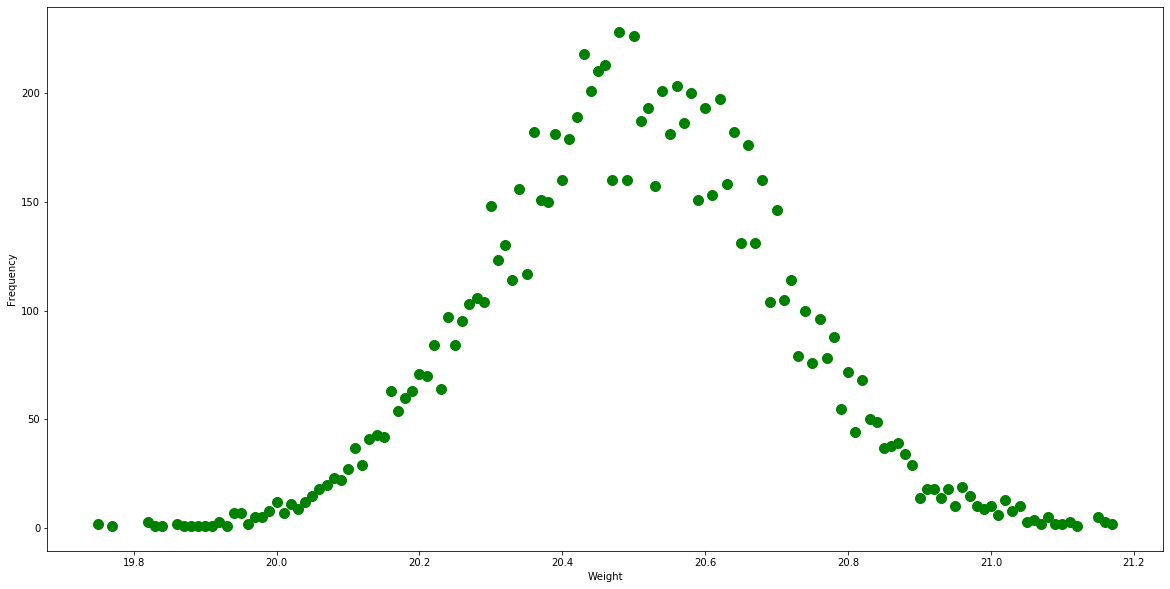

In [18]:
# Set a size for the graph
plt.figure(figsize=(20,10))

# Add axis labels
plt.ylabel('Frequency')
plt.xlabel('Weight')

# Plot the graph using a round symbol "o" of size 10
plt.plot(freq.value,freq.freq, "o", markersize = 10, color = 'g')